# More Propagation of Uncertainties

### Goals:

1. To use simulated experiments to deepen our understanding of propagation of uncertainties.
2. To use visual representations to further deepen our understanding of propagation of uncertainties.

### Timing

1. Try to finish this notebook in 30-35 minutes


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

| Function Name            | What it does |
| - | - |
|    numpy.expand_dims     | Adds a dimension to an array, useful for expanding two 1-D arrays into a 2-D array |
| plt.imshow               | Makes a 2D-color plot by taking the values in a 2-D array to set a color scale |
| plt.colorbar             | Adds a key corresponding to the color scale, e.g., when using plt.imshow |

# Visual understanding of propagation of uncertainties

### First example, how our estimate of $A$ depends on our measurement of $l$

We are again going to simulate 10000 measurements of the length of the desk, assuming that they come from a Gaussian distribution that is centered on the value that we measured, but that have a standard deviation of 10% of that value.  

Then we are going to see what happens to the distribution of outcomes, i.e., of the measurements of the area of the desk, with some further exploration.

In [2]:
## Instantiate a random number generator with a fixed seed for
## later reproducibility. 
rng = np.random.default_rng(42)

In [3]:
## Rewrite the desk area function from the previous notebook.
## Since each notebook has a dedicated kernel, we need to do this
## as 'deskArea' is not a built-in function.
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2

## Use the values from our example, although you're welcome to 
## change to be consistent with what you measured.
C_m = 8.
B_m = 2.5
l_m = 3.8
w_m = 5.1

## Test the function and compute the area of the desk.
A_m = deskArea(w_m, l_m, B_m, C_m)
print(f"Area of desk: {A_m:0.0f} cm^2")

Area of desk: 7752 cm^2


In [4]:
## This function will simulate 10000 measurements with drawn 
## from a Normal distribution. The distribtuion is centered at 
## l_m and has standard deviation of 0.1*l_m
l_sim = rng.normal(loc=l_m, scale=0.1*l_m, size=10000)

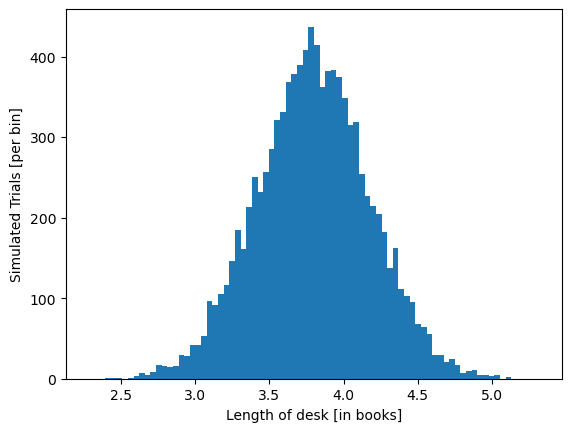

Measurements of desk length: 3.80 ± 0.38 [books]


In [5]:
## Plot our simulated data to make sure everything looks good
plt.hist(l_sim, bins=np.linspace(0.6*l_m, 1.4*l_m, 81))
plt.xlabel("Length of desk [in books]")
plt.ylabel("Simulated Trials [per bin]")
plt.show()

print(f"Measurements of desk length: {np.mean(l_sim):0.2f} ± {np.std(l_sim):0.2f} [books]")

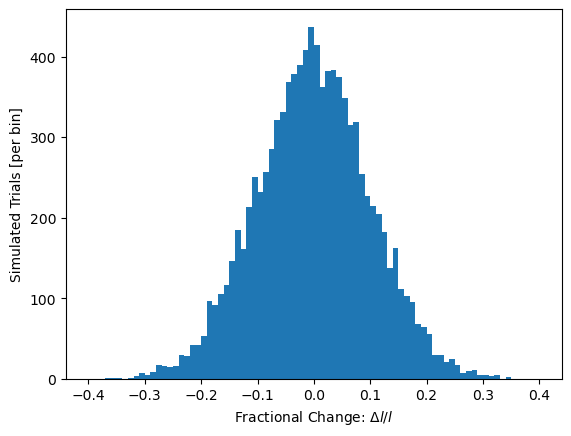

Fractional Change: -0.00 ± 0.10


In [6]:
## Plot the relative change, again as a quick 'debugging' step
## to make sure everything looks good and makes sense.
plt.hist((l_sim/l_m)-1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'Fractional Change: $\Delta l / l$')
plt.ylabel("Simulated Trials [per bin]")
plt.show()

print(f"Fractional Change: {np.mean((l_sim/l_m)-1):0.2f} ± {np.std((l_sim/l_m)-1):0.2f}")

### Now, let's make a figure to show how $A$ depends on $l$

In [7]:
## Let's make a grid of value of l that covers a wide range 
## around the value that we measured. These will be linearly 
## spaced values with a defined: start / end / number of points
l_grid = l_m * np.linspace(0.6, 1.4, 81)

## And let's compute the Area of each value of l
A_from_l = deskArea(w_m, l_grid, B_m, C_m)

One of the arguments from the previous function call `l_grid` is an array instead of a single number! The function then returns another array instead of a number this it used to! How is it doing this?

Python has "dynamic typing" which means that if it will try to do the mathematical operation that's asked, regardless of the type of data/object that it's using. For example, the `deskArea()` function was defined as:
```
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2
```
So if $l$ is an array of values (`l = [l0, l1, l2, ...]`), then it will do the math for each value of $l_i$ within the array. You could also have $w$ and $B$ and $C$ be arrays with the same length as $l$, then it will do the calculation index by index and return an array: `w = [w0 * l0 * B0**2 * C0**2, w1 * l1 * B1**2 * C1**2, ...]`

Sometimes dynamic typing can be helpful (like in this example), and sometimes it can hide errors. Maybe one function is supposed to return a single value that becomes an input to a second function. If the first function is changed and starts returning arrays instead, the second function will try to use the argument and possibly produce strange/unexpected results

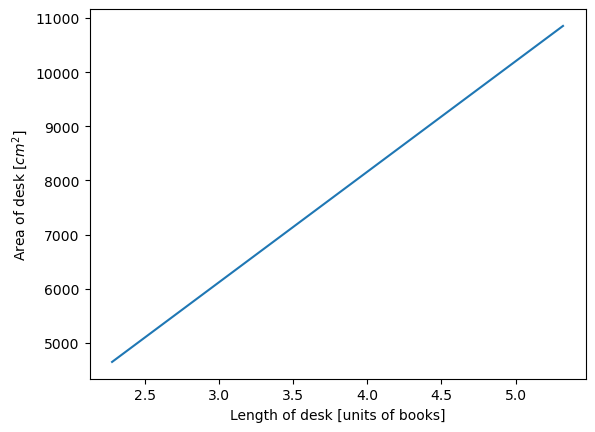

In [8]:
## Now we plot A verse l_grid
plt.plot(l_grid, A_from_l)
plt.ylabel(r'Area of desk [$cm^2$]')
plt.xlabel(r'Length of desk [units of books]')
plt.show()

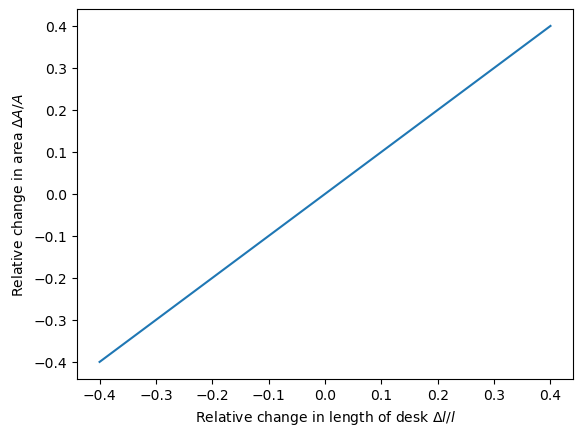

In [9]:
## Plot the relative change in the area as a function of the
## relative change in the length of the desk.
plt.plot((l_grid/l_m)-1, (A_from_l/A_m)-1)
plt.ylabel(r'Relative change in area $\Delta A / A$')
plt.xlabel(r'Relative change in length of desk $\Delta l / l$')
plt.show()

### Questions for discussion:

#### 3.1  Explain what is being shown in the two plots above.  How does this relate to the formula shown above, in particular the formula that includes the partial derivatives?

### Combining the sets of plots above.

The first set of plots show the range of measurments we might expect for $l$ and $\frac{\delta}{l}$.  The second plot shows how $A$ changes if we change $l$.

If we "combine" the two plots, we see the range of values that we might expect for $A$, given the uncertaintiy in $l$.

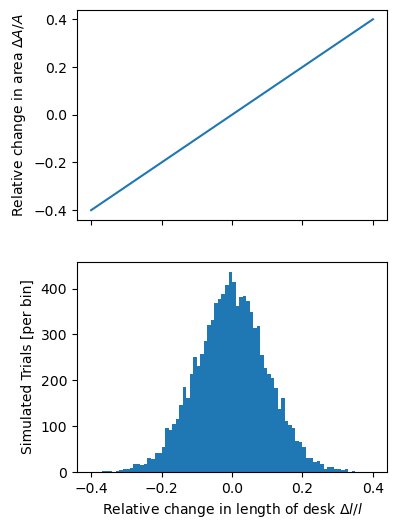

In [10]:
## This command generates a 'figure' object, as well as two
## plotting 'canvases' (axis0 and axis1) that we can use to
## display all the data. There are a lot of options to this
## subplots function giving a huge range of functionality,
## but we just use it for a simple application here
fig, (axis0, axis1) = plt.subplots(2, 1, figsize=(4,6), sharex=True)

## On the top axis, plot the relative change in area as a
## function of the relative change in length, together with a
## histogram of the simulated data on the bottom axis.
axis0.plot((l_grid/l_m)-1, (A_from_l/A_m)-1)
axis1.hist((l_sim/l_m)-1, bins=(l_grid/l_m)-1)

## Set unique ylabels for the plots, but a single x-axis label
## for only the bottom plot (axis1).
axis0.set_ylabel(r'Relative change in area $\Delta A / A$')
axis1.set_ylabel("Simulated Trials [per bin]")
axis1.set_xlabel(r'Relative change in length of desk $\Delta l / l$')

plt.show()

What we mean when we say that we "combine" the two plots, is that for each value of $\frac{\Delta l}{l}$ on the x-axis, the top plot tells us the resulting change $\frac{\Delta A}{A}$, while the bottom plot tells us how likely that value of $\frac{\Delta l}{l}$ is to occur.  

So, we see that large changes in $l$ are less likely than small changes.  And the distribution of outcomes from our little simulation give us a sense of the scatter we would expect in $A$.

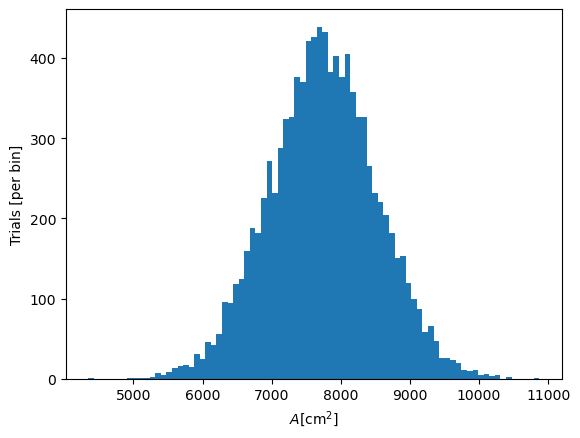

Area of desk: 7744.05 ± 780.07


In [11]:
## Compute the Area for the 10000 "simulated" measurements of l
A_sim_1 = deskArea(w_m, l_sim, B_m, C_m)

## Plot a histogram of the simulated areas to check and see what's
## going on and that everything makes sense.
plt.hist(A_sim_1, bins=81)
plt.xlabel(r'$A [{\rm cm}^2]$')
plt.ylabel(r'Trials [per bin]')
plt.show()

print(f"Area of desk: {np.mean(A_sim_1):0.2f} ± {np.std(A_sim_1):0.2f}")

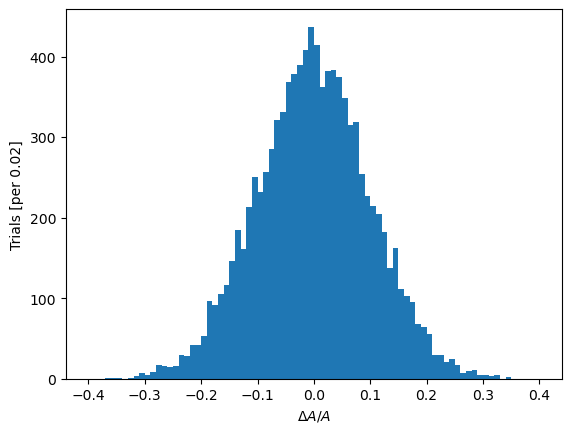

Fractional Change: -0.00 ± 0.10


In [12]:
## Here we are going to compute the resulting relative change in A
dA_over_A_sim_1 = (A_sim_1 - A_m)/A_m

## Plot a histogram of the simulated areas to investigate the 
## resultant spread from the simulated measurements of l.
plt.hist(dA_over_A_sim_1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.show()

## Compute the mean fractional change in the area A, as well as
## the standard deviation of our "measurements" of A
print(f"Fractional Change: {np.mean(dA_over_A_sim_1):0.2f} ± {np.std(dA_over_A_sim_1):0.2f}")

## Second example: how our estimate of A depends on C

Now we are going to repeat the exercise, but this time we are going to vary $C$, our estimate of the length of the card in cm.

In [13]:
## Generate an array of values for C, as well as a simulated
## set of measurements of C drawn from a Normal distribution
C_grid = C_m * np.linspace(0.6, 1.4, 81)
C_sim = rng.normal(loc=C_m, scale=0.1*C_m, size=10000)
A_from_C = deskArea(w_m, l_m, B_m, C_grid)

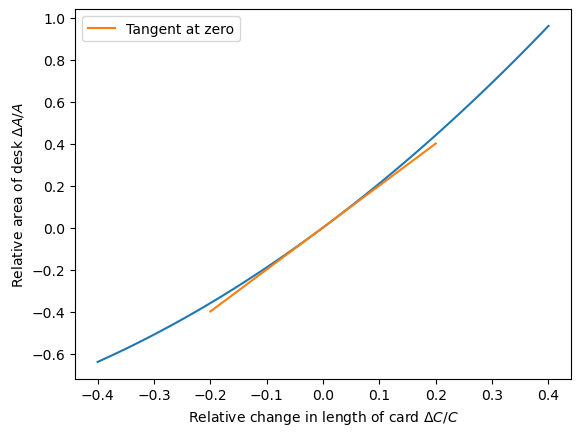

In [14]:
## Plot the fractional change in area computed for each value 
## of C in our array as a function of the relative change in C
plt.plot((C_grid / C_m)-1, (A_from_C / A_m)-1)
plt.plot(np.linspace(-0.2,0.2,11), 2*np.linspace(-0.2,0.2,11), label="Tangent at zero")
plt.ylabel(r'Relative area of desk $\Delta A / A$')
plt.xlabel(r'Relative change in length of card $\Delta C / C$')
plt.legend()
plt.show()

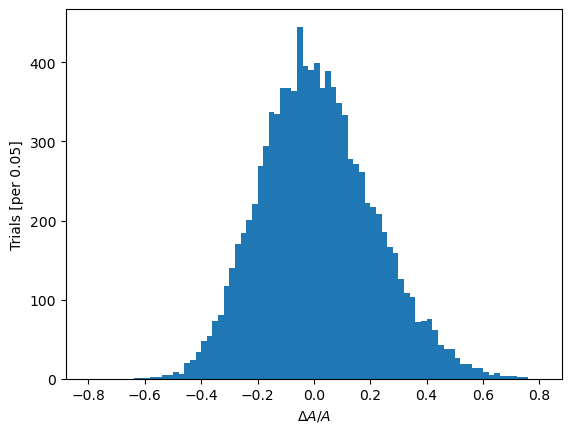

Fractional Change: 0.01 ± 0.20


In [15]:
## Compute the areas for the simulated measurements of C, and
## compute teh fractional change relative to the mean value.
A_sim_2 = deskArea(w_m, l_m, B_m, C_sim)
dA_over_A_sim_2 = (A_sim_2 - A_m)/A_m

## Plot a histogram of the simulated areas to investigate the 
## resultant spread from the simulated measurements of C.
plt.hist(dA_over_A_sim_2, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.05]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_2):0.2f} ± {np.std(dA_over_A_sim_2):0.2f}")

## Questions for discussion  

#### 4.1 How can we interpret the two plots above?  What does it mean for our estimate of the uncertainty on $A$?  
#### 4.2 Why does this differ from the results we got when we considered the variation in $A$ due to the variation in $l$?  
#### 4.3 Why did we draw the tangent line on the figure a few cells up?   What does the tangent line correspond to in the equation for propagation of uncertainties?

## A special case of uncertainty propagation

Recall the exercise from the previous notebook about measuring the energy flux from the sun. We're going to focus on measuring $n_\gamma$, the number of photons measured by our photodetector in the measurement time $t$.

In order to write down the distribution for $n_\gamma$, we need to know the mean value. Let's assume the energy flux on Earth is 1000 Watts/m $^2$ (our hypothetical experimenter doesn't know this yet, though!) 

We'll make the approximation that all of the photons have energy 3 eV (in reality, the photon energy from the sun follows a [blackbody distribution](https://en.wikipedia.org/wiki/Black-body_radiation)) and our photodetector is 1 mm $^2$ in area. This means we expect about $10^{15}$ photons to hit our detector every second.

The number of photons hitting the detector every second will therefore follow a Poisson distribution with mean $\lambda = 1e15$ photons/second. So the probability of measuring $k$ photons in one second is given by:
$$
P(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

### Experiment 1

Let's simulate what a single set of measurements might look like. Imagine we leave our photodetector in the sun for 10000 seconds (about 3 hours) and record the number of photons counted in each second.

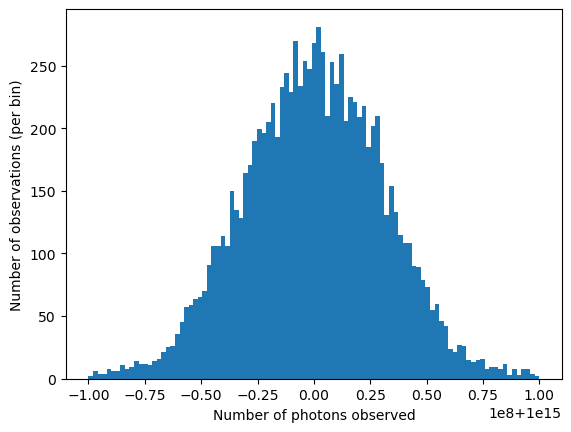

In [16]:
## Generate a bunch of samples from a poisson distribution
## with a very large mean value (i.e. a 'high-frquency' process)
sample1 = rng.poisson(1e15, 10000)

## Given that the poisson distribution has variance equal to
## the mean, generate some bin values based on this expectation
bins = np.linspace(1e15-1e8, 1e15+1e8, 100)

## Plot our sample just to see what's going on.
plt.hist(sample1, bins)
plt.xlabel("Number of photons observed")
plt.ylabel("Number of observations (per bin)")
plt.show()

In [17]:
## Print the mean and standard deviation
print(f"Sample mean : {np.mean(sample1):0.3g}")
print(f"Standard dev: {np.std(sample1):0.3g}")

Sample mean : 1e+15
Standard dev: 3.22e+07


### Question:

##### 5.1 Do the sample mean and standard deviation match what you expect from the Poisson distribution?

### Experiment 2

Now imagine that we perform this measurement every day for 500 days. At the end of each day, we write down the mean and standard deviation of the dataset for that day. (We'll assume we are drawing from the same Poisson distribution every time, although in reality it will change depending on the Earth's position in its orbit.)

At the end of the 500 days, we take the 500 means and plot them in a histogram. Here's what that would look like:

(500,)
Mean of the sample means:         1e+15
Standard dev of the sample means: 3.32e+05


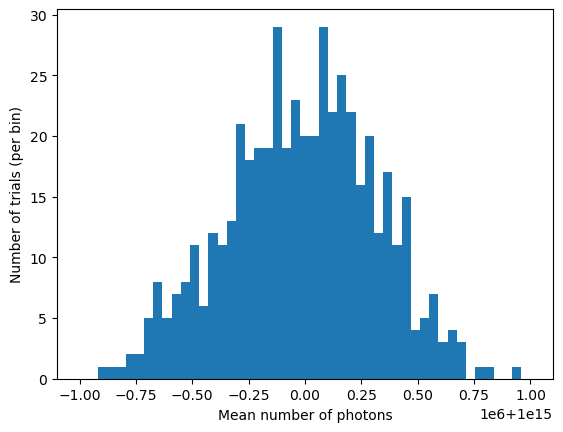

In [18]:
## This will create a 500x10000 array, where each row represents 
## a single day's dataset with 10,000 data points
num_days = 500
num_seconds = 10000
sample_array = rng.poisson(1e15, size=(num_days, num_seconds))

## You can use numpy to take means across specific axes of an
## array, for instance, to average over the values from each of
## the 500 days. The function below takes a mean across the first
## axis and yield an array of 500 values, one for each day.
means = np.mean(sample_array, axis=1)
print(means.shape)

## Print the mean of the sample means, and the standard deviation
## of the sample means.
print(f"Mean of the sample means:         {np.mean(means):0.3g}")
print(f"Standard dev of the sample means: {np.std(means):0.3g}")

## Note that the axes are different from the previous plot! This
## time we're plotting a histogram of trials with a specific
## number of photons rather than every 1-s recording period.
bins = np.linspace(1e15-1e6, 1e15+1e6, 50)
plt.hist(means, bins)
plt.xlabel("Mean number of photons")
plt.ylabel("Number of trials (per bin)")
plt.show()


### Experiment 3

After 500 days, we decide that we need more data. We buy 9 more photosensors (so now we have 10) and again record for 10,000 seconds each day, giving 100,000 samples per day. We do this for another 500 days.

Mean of the sample means:         1e+15
Standard dev of the sample means: 9.72e+04


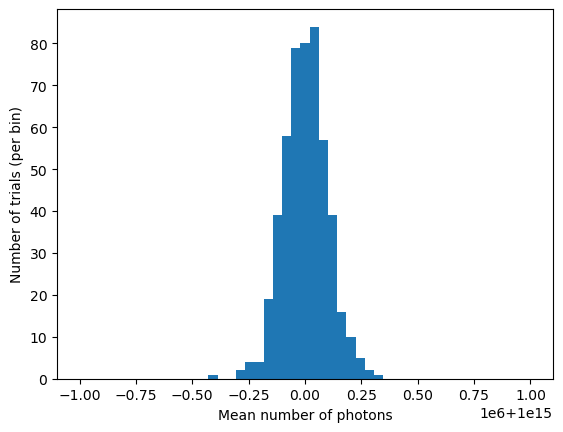

In [19]:
## Generate the same type of dataset, but with 10 times as many 
## sensors, we have 10 times the data to deal with.
num_days = 500
num_seconds = 10000
num_sensors = 10
sample_array = rng.poisson(1e15, size=(num_days, num_sensors * num_seconds))

## Here we again take the mean across one axis of the sample_array,
## giving us a 1D array of 500 values, one for each day.
means = np.mean(sample_array, axis=1)

## Print the mean of the sample means, and the standard deviation
## of the sample means.
print(f"Mean of the sample means:         {np.mean(means):0.3g}")
print(f"Standard dev of the sample means: {np.std(means):0.3g}")

bins = np.linspace(1e15-1e6, 1e15+1e6, 50)
plt.hist(means, bins)
plt.xlabel("Mean number of photons")
plt.ylabel("Number of trials (per bin)")
plt.show()

### Experiment 4

Someone is cleaning out the lab next door and finds some more photosensors. Now we have 100 sensors. If we again measure for 10,000 seconds per day, that gives us 1,000,000 samples per day. We do this for another 500 days.

Mean of the sample means:         1e+15
Standard dev of the sample means: 3.26e+04


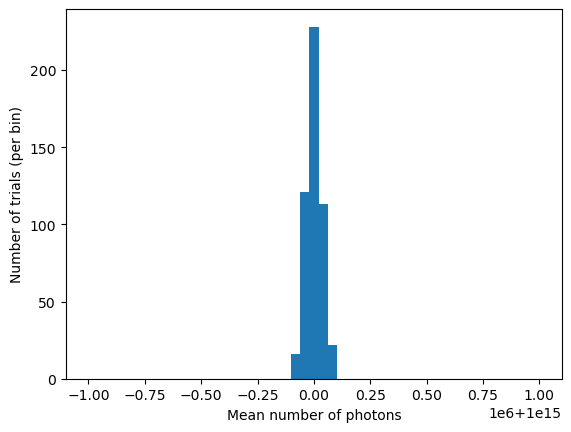

In [20]:
## Generate the same type of dataset, but with 100 times as many 
## sensors, we have 100 times the data to deal with.
num_days = 500
num_seconds = 10000
num_sensors = 100
sample_array = rng.poisson(1e15, size=(num_days, num_sensors * num_seconds))

## Here we again take the mean across one axis of the sample_array,
## giving us a 1D array of 500 values, one for each day.
means = np.mean(sample_array, axis=1)

## Print the mean of the sample means, and the standard deviation
## of the sample means.
print(f"Mean of the sample means:         {np.mean(means):0.3g}")
print(f"Standard dev of the sample means: {np.std(means):0.3g}")

bins = np.linspace(1e15-1e6, 1e15+1e6, 50)
plt.hist(means, bins)
plt.xlabel("Mean number of photons")
plt.ylabel("Number of trials (per bin)")
plt.show()

### Question:

##### 6.1 What do you notice about the shapes of the distributions for different numbers of observations taken each day? Is this what you expect?

##### 6.2 What do you notice about the mean and standard deviation of each distribution? Be specific!

### Comparing with theory

Now let's compare the uncertainties we see in our simulation data with what we should expect to see. To do so, we have to think about what data we are really analyzing. For experiment 1, we have a bunch of observations in a single dataset. For experiments 2, 3 and 4, we have many datasets, and what we are really plotting is the mean of each dataset.

How can we calculate the standard deviation we expect for each set of mean values? We'll start with the general formula for propagation of uncertainties:
$$
\sigma_f^{2}(x_i) = \sum_{i=1}^N \left(\frac{\partial f}{\partial x_i} \delta x_i\right)^2
$$

In this case, the function of interest $f$ is the *mean of the dataset*, which is given by:
$$
\mu = \frac{1}{N} \sum_{i=1}^N x_i
$$



### Questions:

##### 7.1 What are the partial derivatives $\partial f / \partial x_i$?

##### 7.2 Plug in for the partial derivatives and simplify to show that $\sigma_f = \delta x_i / \sqrt{N}$

Hint: Keep in mind that we are drawing from the same distribution every time we make a measurement. What does this tell you about the values of $\delta x_i$?


### Surprise! We've just derived the formula for the standard error on the mean.

##### 7.3 Does this exercise contribute to your understanding of the standard error? If so, how? How does the standard error on the mean differ from the individual standard deviations of each measurement?

##### 7.4 Plug in numbers to show that the means and standard errors that we found in the simulations above agree with the formula $\sigma_f = \delta x_i / \sqrt{N}$. Please show your work!